<h2>Market Study - Food Industry Exports</h2>

<a href="https://openclassrooms.com/en/" >Openclassrooms</a>, Data Analyst Course
<br>Project 5 - Michael Orange

<hr>

A company in the food industry specialized in chicken is looking at expanding worldwide. All countries are considered. 
<br>The main objective is to provide the company with data ensuring it will collaborate with the most promising export market countries. 

Grouping countries in 'clusters' based on their similarity is required. 
<br>Default variables are: 
- country population, 
- population growth, 
- calory supply per capita and protein supply per capita, 
- prevalence of animal proteins in the mix. 

Additional relevant variable might be included (ex. GDP per capita)

**Section 1** - [Import and Variable selections](#import)

**Section 2** - [Data overview](#overview)

**Section 3** - [Transoform data (Normalization)](#transform)

**Section 4** - [Hierarchical Clustering](#clustering)

**Section 5** - [PCA - Principal Component Analysis](#pca) 
- [Number of components](#comp)
- [Synthetic variables and Correlation Circles](#synth)
- [Individuals factor map](#map)

**Section 6** - [Analysis of the clusters](#analysis) 

<hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import scipy.cluster.hierarchy as hierarchy

from sklearn import preprocessing
from sklearn import decomposition

from display_pca import *

<h2>Import Dataset and Selecting variables</h2>

In [2]:
#import 
data_country = pd.read_csv("data/output/data_country_simplified.csv")
data_country

,country,food_supply_kcalcapitaday_2017,pop_growth_percent,protein_supply_gcapitaday_2017,prevalence_protein_animal_percent_2017,pop_2017_thousand
0,Afghanistan,1997.0,12.477767,54.09,19.523017,36296.113
1,Albania,3400.0,-0.675703,119.50,55.497908,2884.169
2,Algeria,3345.0,8.518733,92.85,27.679052,41389.189
3,Angola,2266.0,14.610305,54.09,30.449251,29816.766
4,Antigua and Barbuda,2429.0,4.272477,81.15,66.605052,95.426
...,...,...,...,...,...,...
167,Venezuela (Bolivarian Republic of),2247.0,-1.271131,56.30,45.115453,29402.484
168,Viet Nam,2938.0,4.240161,90.03,40.875264,94600.648
169,Yemen,2062.0,10.687948,53.24,20.060105,27834.819
170,Zambia,2008.0,12.910256,59.06,19.776498,16853.599


In [3]:
#selection variables for the PCA
data_pca= data_country.copy().drop(['pop_2017_thousand'], axis = 1)
data_pca.set_index(['country'], inplace=True)

In [4]:
data_pca

,food_supply_kcalcapitaday_2017,pop_growth_percent,protein_supply_gcapitaday_2017,prevalence_protein_animal_percent_2017
country,,,,
Afghanistan,1997.0,12.477767,54.09,19.523017
Albania,3400.0,-0.675703,119.50,55.497908
Algeria,3345.0,8.518733,92.85,27.679052
Angola,2266.0,14.610305,54.09,30.449251
Antigua and Barbuda,2429.0,4.272477,81.15,66.605052
...,...,...,...,...
Venezuela (Bolivarian Republic of),2247.0,-1.271131,56.30,45.115453
Viet Nam,2938.0,4.240161,90.03,40.875264
Yemen,2062.0,10.687948,53.24,20.060105


<h2>Overview of the data</h2>

In [5]:
data_pca.describe()

,food_supply_kcalcapitaday_2017,pop_growth_percent,protein_supply_gcapitaday_2017,prevalence_protein_animal_percent_2017
count,172.000000,172.000000,172.000000,172.000000
mean,2858.395349,5.475461,81.192907,42.695622
std,454.544301,5.016197,20.199063,15.991917
min,1754.000000,-5.434483,39.910000,8.912249
25%,2514.250000,1.910891,64.212500,29.060776
50%,2871.500000,4.755661,81.390000,43.733922
75%,3250.250000,9.093107,96.445000,56.821064
max,3770.000000,23.935417,141.340000,73.331883


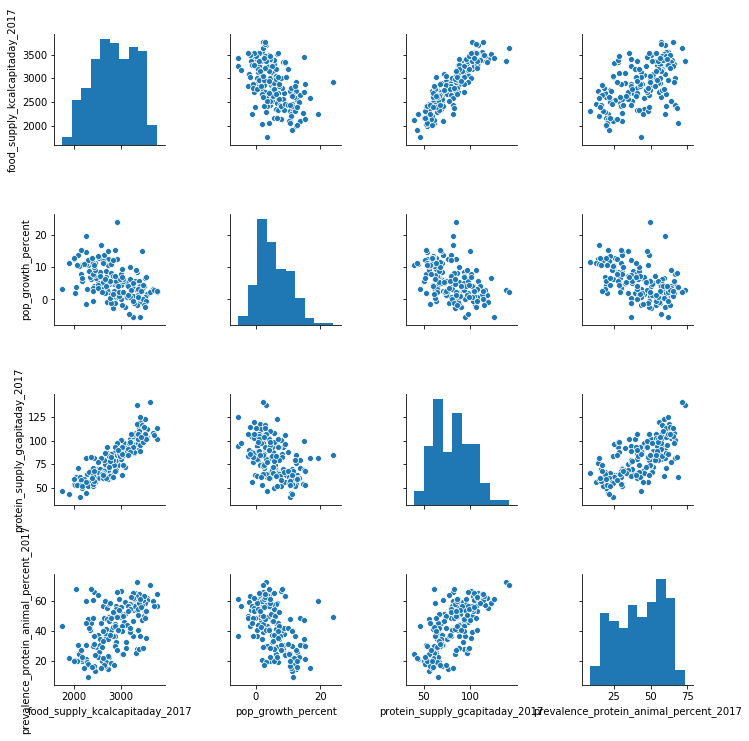

In [6]:
sns.pairplot(data_pca)

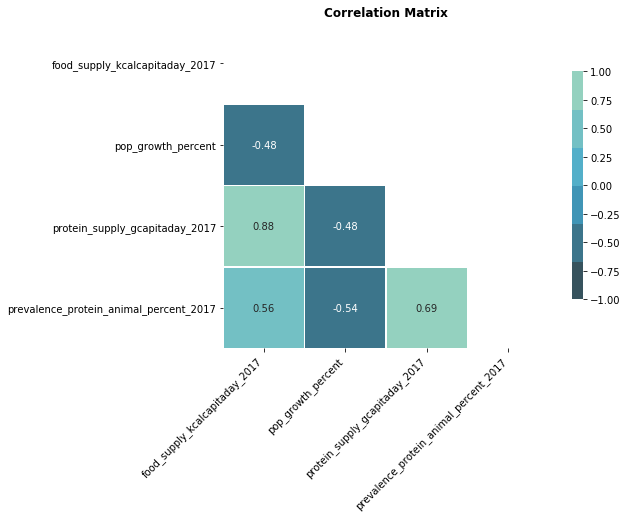

In [7]:
# Compute the correlation matrix
corr = data_pca.corr()
# Display correlation matrix
display_corr_matrix(corr)


<h2>Transform data (Normalization)</h2>

In [8]:
X = data_pca.values
names = data_pca.index
features = data_pca.columns
print(X.shape)

(172, 4)


In [9]:
#number of observations
n = X.shape[0]
# number of variables
p = X.shape[1]

In [10]:
# Standardization and reduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

<h2>Clustering</h2>

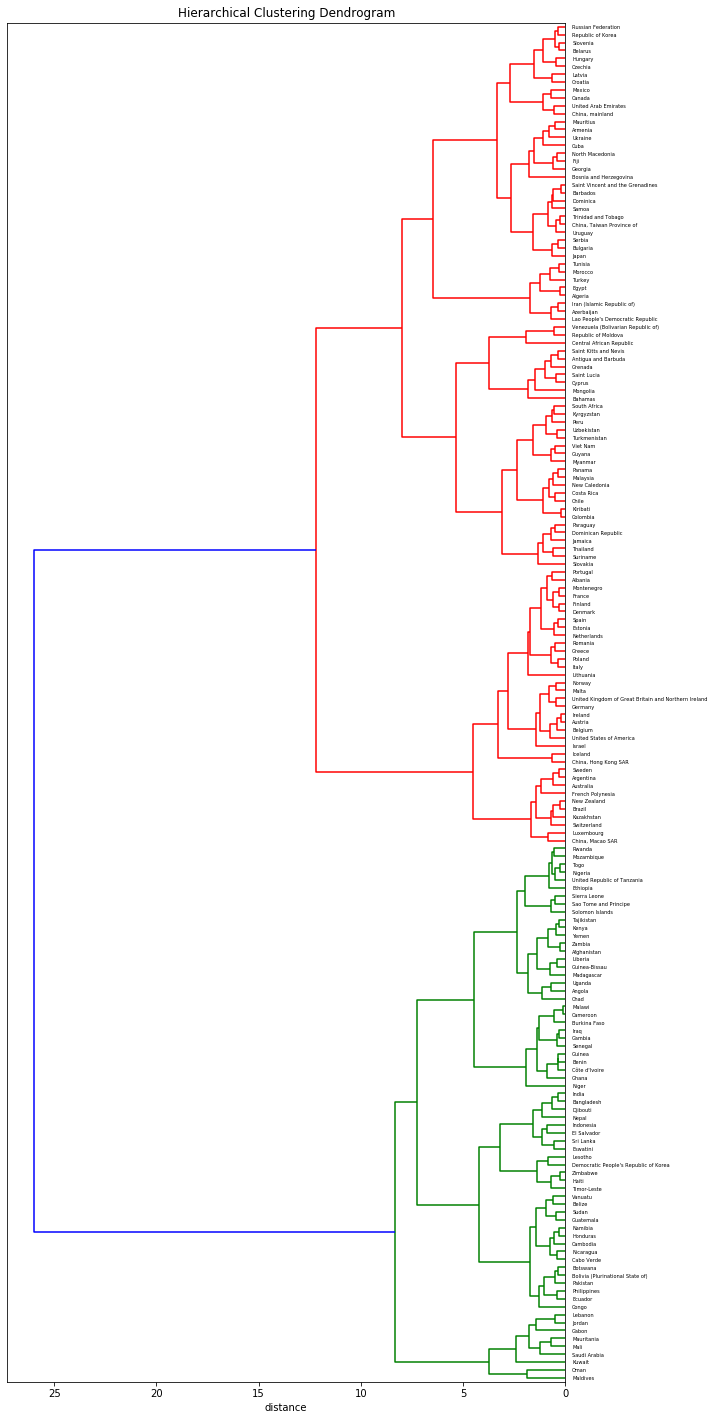

In [11]:
# Clustering hiérarchique
Z = hierarchy.linkage(X_scaled, 'ward')

#dendogram
plot_dendrogram(Z, names)

In [12]:
num_clusters = 5

In [13]:
clusters = hierarchy.fcluster(Z, num_clusters, criterion='maxclust')

In [14]:
df_cluster = pd.DataFrame(clusters)
df_cluster.columns = ['cluster']
df_cluster.index=names

In [15]:
df_cluster.reset_index().pivot_table(index='cluster', values='country', aggfunc=len)

,country
cluster,
1,9
2,59
3,35
4,31
5,38


<h2>Principal Component Analysis</h2>

In [16]:
# PCA
pca = decomposition.PCA(n_components=p)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<h3>Number of components</h3>

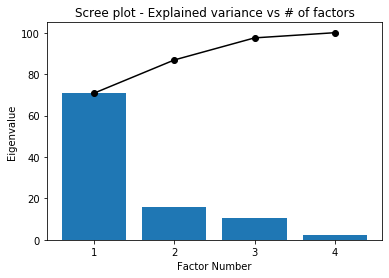

In [17]:
# Scree plot
display_scree_plot(pca)

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis).

In [19]:
n_comp = 3

In [20]:
# PCA with selected number of components
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

X_projected = pca.transform(X_scaled)

<h3>Correlation circles and Synthetic variables</h3>

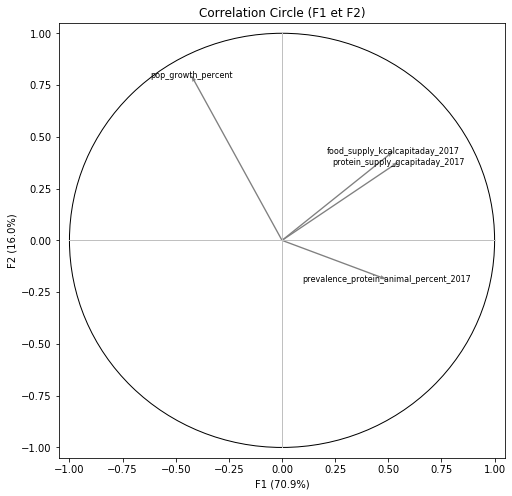

In [21]:
# Correlation Circle F1 and F2
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

F1: Level of development
<br>F2 : Population growth

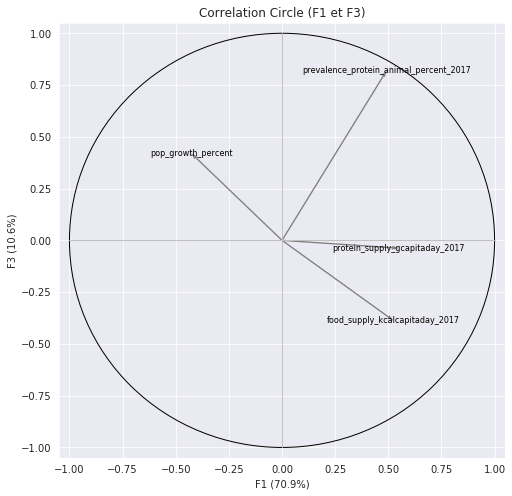

In [31]:
# Correlation Circle F1 and F3
display_circles(pcs, n_comp, pca, [(0,2)], labels = np.array(features))

F1: Level of development
<br>F2 : Consumption of animals per capita

In [23]:
# data frame with new synthetic variables
df_X_projected = pd.DataFrame(X_projected, index=names, columns=['F'+str(i+1) for i in range(n_comp)])
df_X_projected = pd.concat([df_X_projected, df_cluster], axis=1)
df_X_projected.reset_index(inplace=True, col_level=-1)
first_col = df_X_projected.pop('country')
df_X_projected.insert(len(df_X_projected.columns), 'country', first_col)
df_X_projected

,F1,F2,F3,cluster,country
0,-3.047261,0.061845,0.184299,2,Afghanistan
1,2.589711,0.103559,-0.393472,3,Albania
2,0.156641,1.344102,-0.953296,5,Algeria
3,-2.581211,0.528063,0.695487,2,Angola
4,0.342871,-0.882988,1.494634,4,Antigua and Barbuda
...,...,...,...,...,...
167,-0.733574,-2.153080,0.125633,4,Venezuela (Bolivarian Republic of)
168,0.381984,0.066544,-0.281957,4,Viet Nam
169,-2.825741,-0.184047,0.007424,2,Yemen
170,-2.928377,0.231765,0.215035,2,Zambia


In [24]:
# composition of the synthetic variables

F_composition = {}
for k in range(n_comp):
    F_composition['F{}'.format(k+1)] = {}
    for n in range(p):
        F_composition['F{}'.format(k+1)].update({data_pca.columns[n]: pca.components_[k][n]})
pd.DataFrame(F_composition)

,F1,F2,F3
food_supply_kcalcapitaday_2017,0.524113,0.430433,-0.387153
pop_growth_percent,-0.427322,0.797198,0.420688
protein_supply_gcapitaday_2017,0.548253,0.379044,-0.037579
prevalence_protein_animal_percent_2017,0.492057,-0.188490,0.819587


<h3>Individuals factor map</h3>

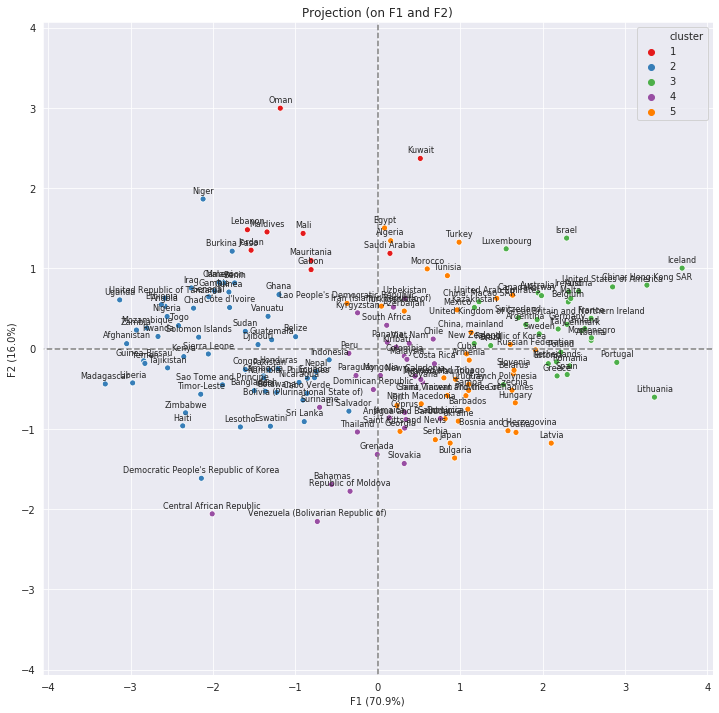

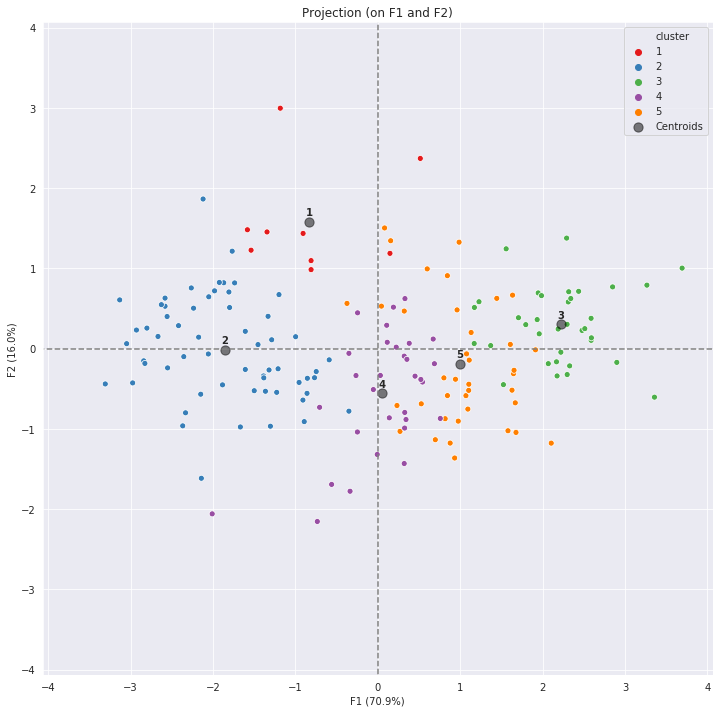

In [25]:
display_factorial_planes(X_projected, n_comp, pca,[(0,1)], labels=names, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca,[(0,1)], illustrative_var=df_X_projected.cluster)

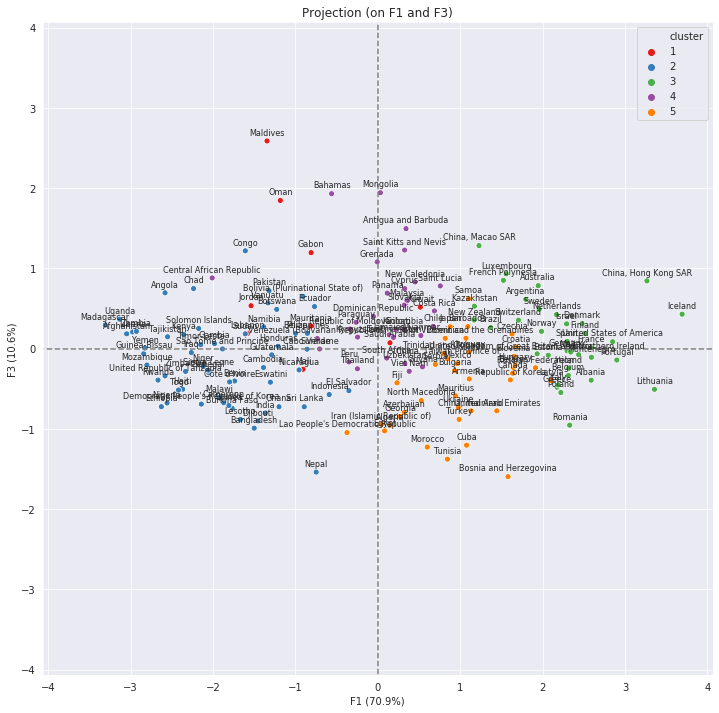

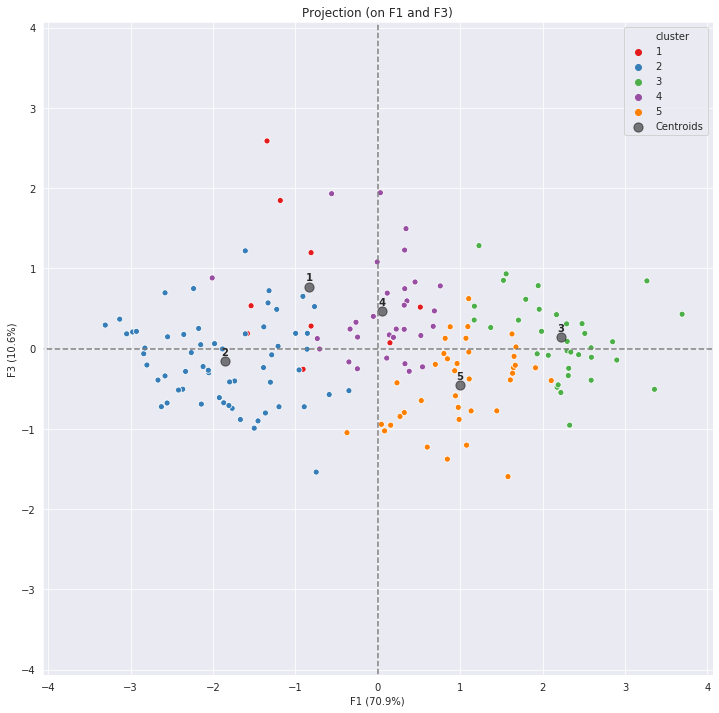

In [26]:
display_factorial_planes(X_projected, n_comp, pca,[(0,2)], labels=names, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca,[(0,2)], illustrative_var=df_X_projected.cluster)

<h2>Cluster Analysis</h2>

In [27]:
data_country = pd.merge(data_country,df_X_projected[['country', 'cluster']])
data_country.pivot_table(index='cluster', values=data_country.columns[1:-1], aggfunc=np.mean)

,food_supply_kcalcapitaday_2017,pop_2017_thousand,pop_growth_percent,prevalence_protein_animal_percent_2017,protein_supply_gcapitaday_2017
cluster,,,,,
1,2868.222222,9309.405222,15.233626,41.964121,81.596667
2,2431.576271,54195.604525,9.067425,26.031018,61.252034
3,3401.057143,32189.760029,2.228992,60.766766,108.956000
4,2699.806452,17024.339194,4.151317,51.119506,76.172258
5,3148.315789,64027.904553,1.657710,45.226273,90.582632


In [28]:
# data by clusters (group1, group2, etc.)
for n in range(num_clusters):
    group = 'group{}'.format(n)
    vars()[group] = data_country.loc[data_country['cluster']==n]   

In [29]:
group3.describe()

,food_supply_kcalcapitaday_2017,pop_growth_percent,protein_supply_gcapitaday_2017,prevalence_protein_animal_percent_2017,pop_2017_thousand,cluster
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,3401.057143,2.228992,108.956000,60.766766,32189.760029,3.0
std,195.474527,2.940953,11.073298,5.091519,64124.432812,0.0
min,2917.000000,-5.434483,90.800000,49.005815,276.102000,3.0
25%,3260.500000,0.518452,103.445000,57.251794,3793.101500,3.0
50%,3400.000000,2.382453,106.990000,60.705446,8819.901000,3.0
75%,3523.500000,3.721465,113.365000,63.830330,31268.900000,3.0
max,3770.000000,9.095768,141.340000,73.331883,325084.756000,3.0


In [30]:
group3

,country,food_supply_kcalcapitaday_2017,pop_growth_percent,protein_supply_gcapitaday_2017,prevalence_protein_animal_percent_2017,pop_2017_thousand,cluster
1,Albania,3400.0,-0.675703,119.50,55.497908,2884.169,3
5,Argentina,3239.0,4.126241,102.66,63.968440,43937.140,3
7,Australia,3307.0,5.717962,108.01,65.993889,24584.620,3
8,Austria,3694.0,3.082120,108.11,60.012950,8819.901,3
14,Belgium,3770.0,2.382453,101.35,57.109028,11419.748,3
20,Brazil,3250.0,3.381441,90.87,58.104985,207833.823,3
30,"China, Hong Kong SAR",3353.0,3.068851,137.88,73.331883,7306.322,3
31,"China, Macao SAR",2999.0,7.830827,100.37,66.842682,622.585,3
43,Denmark,3383.0,1.669503,112.92,64.851222,5732.274,3
50,Estonia,3241.0,0.024866,107.29,57.311958,1319.390,3
